In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Data Exploration and Preprocessing

In [8]:
df=pd.read_csv('Alphabets_data.csv')
df

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [9]:
num_samples = df.shape[0]
num_features = df.shape[1] - 1
num_samples,num_features

(20000, 16)

In [10]:
classes = df['letter'].unique()
num_classes = len(classes)
num_classes, classes

(26,
 array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
        'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
       dtype=object))

In [11]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

C:\Users\rajiv\AppData\Local\Temp\ipykernel_18404\731218573.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.pairplot(df.corr())


<Figure size 1000x800 with 0 Axes>

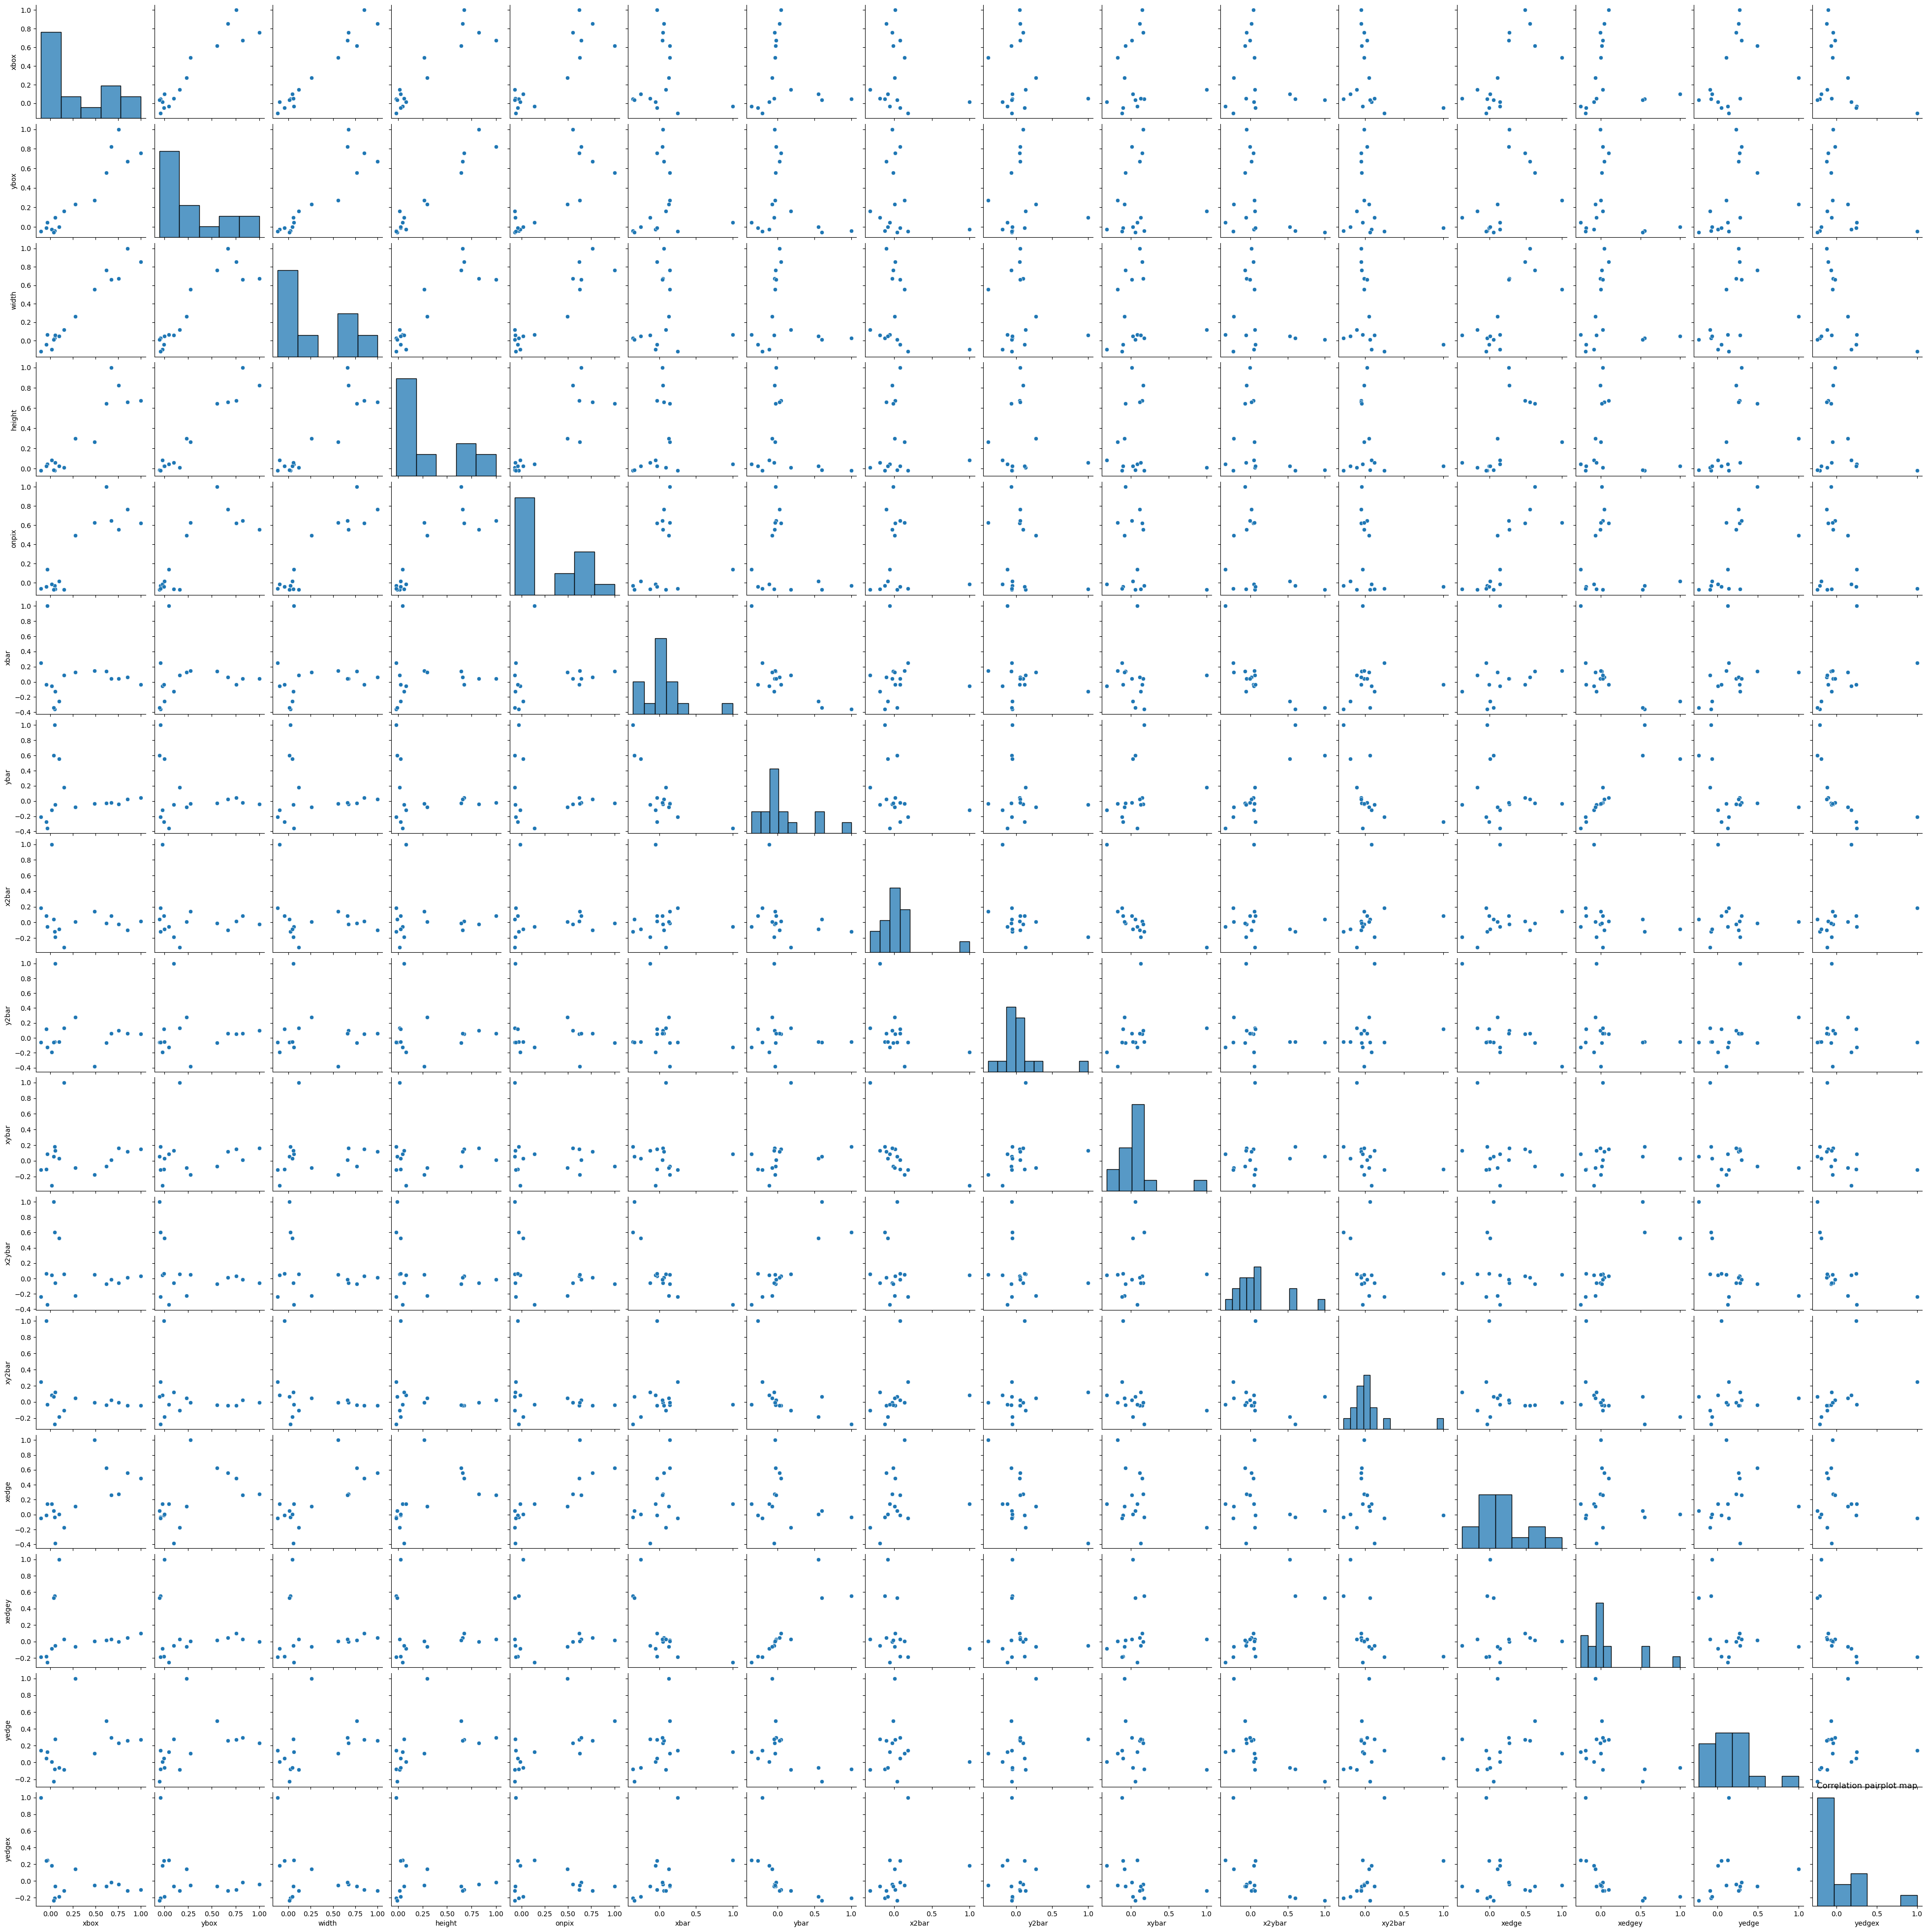

In [14]:
plt.figure(figsize=(10, 8))
sns.pairplot(df.corr())
plt.title('Correlation pairplot map')
plt.show()

In [7]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df[df.columns[1:]])
X

array([[0.13333333, 0.53333333, 0.2       , ..., 0.53333333, 0.        ,
        0.53333333],
       [0.33333333, 0.8       , 0.2       , ..., 0.53333333, 0.26666667,
        0.66666667],
       [0.26666667, 0.73333333, 0.4       , ..., 0.46666667, 0.2       ,
        0.6       ],
       ...,
       [0.4       , 0.6       , 0.4       , ..., 0.8       , 0.13333333,
        0.26666667],
       [0.13333333, 0.2       , 0.26666667, ..., 0.6       , 0.33333333,
        0.53333333],
       [0.26666667, 0.6       , 0.4       , ..., 0.46666667, 0.13333333,
        0.53333333]])

In [8]:
!pip install tensorflow==2.14.0

In [9]:
!pip install keras

In [10]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['letter'])


# 2. Model Implementation

In [11]:
from sklearn.model_selection import train_test_split,GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [12]:
model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50, random_state=42)

In [13]:
model.fit(X_train, y_train)

C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=50, random_state=42)

In [14]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")
print(f"Test F1-Score: {f1 * 100:.2f}%")


Test Accuracy: 80.00%
Test Precision: 80.39%
Test Recall: 80.00%
Test F1-Score: 79.95%


# 3. Hyperparameter Tuning

In [15]:
param_grid = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)], 'activation': ['tanh', 'relu','linear'],'solver': ['sgd', 'adam'],'learning_rate_init': [0.001, 0.01, 0.1],'max_iter': [200]}

In [17]:
model = MLPClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Hyperparameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


y_pred1 = best_model.predict(X_test)


Fitting 3 folds for each of 72 candidates, totalling 216 fits


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
72 fits failed out of a total of 216.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
48 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py", line 747, in fit
    self._validate_params()
  File "C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rajiv\anac

Best Hyperparameters: {'activation': 'tanh', 'hidden_layer_sizes': (100, 100), 'learning_rate_init': 0.1, 'max_iter': 200, 'solver': 'sgd'}


C:\Users\rajiv\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# 4. Evaluation

In [ ]:

accuracy1 = accuracy_score(y_test, y_pred1)
precision1 = precision_score(y_test, y_pred1, average='weighted')
recal1l = recall_score(y_test, y_pred1, average='weighted')
(f1) = f1_score(y_test, y_pred1, average='weighted')
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Precision: {precision * 100:.2f}%")
print(f"Test Recall: {recall * 100:.2f}%")
print(f"Test F1-Score: {f1 * 100:.2f}%")


print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Default Model:

Accuracy:80.00%
Precision: 80.39%
Recall: 80.00%
F1-Score: 79.95%

Tuned Model:

Accuracy: 96.02%
Precision: 96.14%
Recall: 96.02%
F1-Score: 96.01%


 Impact of Hyperparameter Tuning:
 
1.Hidden Layers and Neurons: Optimizing the structure of the neural network improved its ability to capture complex patterns.

2.Activation Functions: Using ReLU led to better handling of nonlinear relationships.

3.Solver (Optimizer): adam proved to be more effective and efficient.

4.Learning Rate: An optimal learning rate ensured faster and more stable convergence.

Conclusion
Hyperparameter tuning significantly improved the performance of the ANN model across all evaluation metrics. This systematic approach led to a more accurate, precise, and well-balanced model, demonstrating the importance of optimizing model parameters for better performance.






